Tercer punto:


Starting point: [1.2 1.2]

Steepest Descent:
Final point: [1.0127633  1.02536825]
Function value: 0.0001732227691922814
Number of iterations: 1001
Step lengths: [0.0009765625, 0.0009765625, 0.0009765625, 0.0009765625, 0.001953125, 0.001953125, 0.001953125, 0.0009765625, 0.0078125, 0.0009765625, 0.00390625, 0.001953125, 0.0009765625, 0.0078125, 0.0009765625, 0.00390625, 0.001953125, 0.0009765625, 0.0078125, 0.0009765625, 0.00390625, 0.001953125, 0.0009765625, 0.0078125, 0.0009765625, 0.00390625, 0.001953125, 0.0009765625, 0.0078125, 0.0009765625, 0.00390625, 0.001953125, 0.0009765625, 0.0078125, 0.0009765625, 0.00390625, 0.001953125, 0.0009765625, 0.0078125, 0.0009765625, 0.00390625, 0.001953125, 0.0009765625, 0.0078125, 0.0009765625, 0.0078125, 0.0009765625, 0.00390625, 0.001953125, 0.0009765625, 0.0078125, 0.0009765625, 0.00390625, 0.001953125, 0.0009765625, 0.0078125, 0.0009765625, 0.0078125, 0.0009765625, 0.00390625, 0.001953125, 0.0009765625, 0.0078125, 0.0009765625, 0.00390625, 0

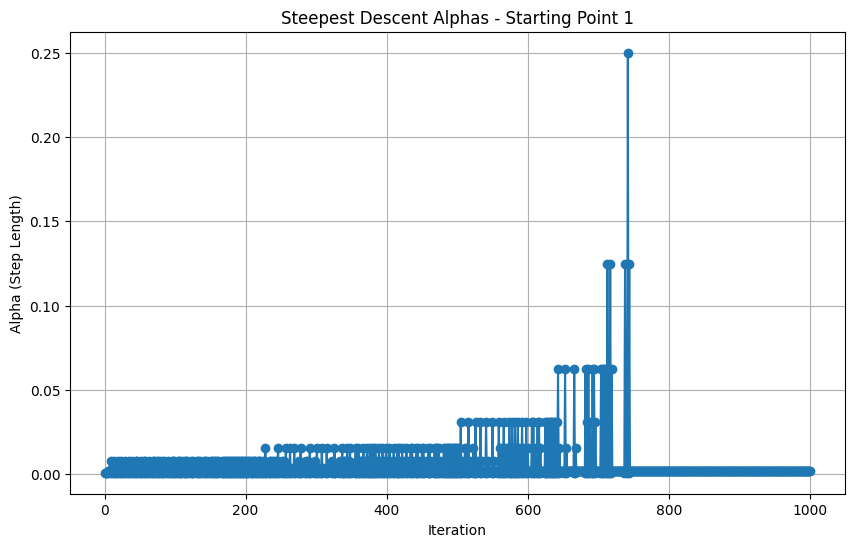


Newton's Method:
Final point: [1.00000018 1.00000035]
Function value: 3.226676189013061e-14
Number of iterations: 8
Step lengths: [1, 0.5, 1, 1, 1, 1, 1, 1]


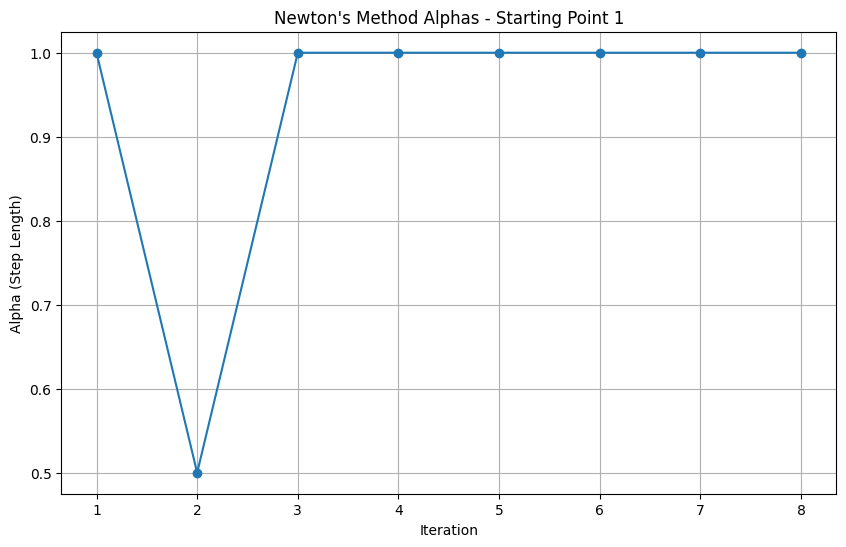


Starting point: [-1.2  1. ]

Steepest Descent:
Final point: [0.97277594 0.9460233 ]
Function value: 0.000748424735481543
Number of iterations: 1001
Step lengths: [0.0009765625, 0.001953125, 0.0009765625, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.00390625, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.5, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.001953125, 0.00390625, 0.001953125, 0.001953125, 0.001953125, 0.00390625, 0.001953125, 0.001953125, 0.001953125, 0.00390625, 0.001953125, 0.001953125, 0

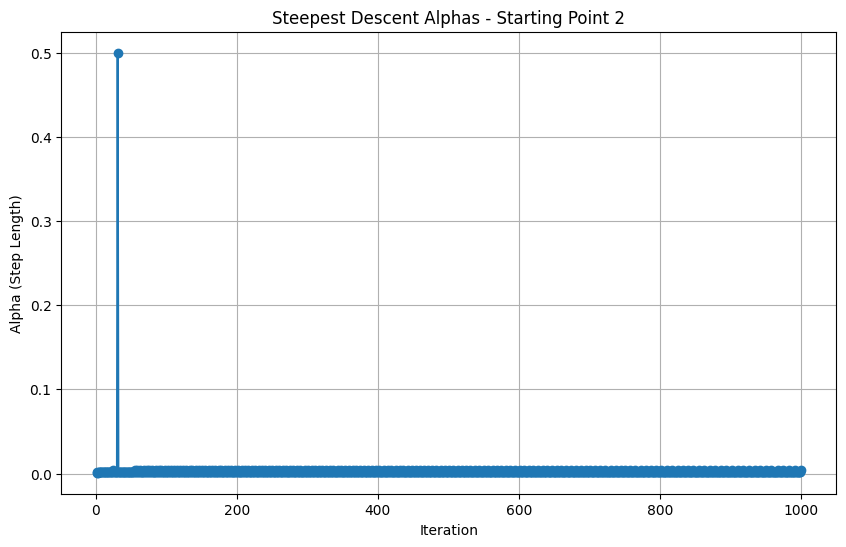


Newton's Method:
Final point: [1. 1.]
Function value: 3.743975643139474e-21
Number of iterations: 22
Step lengths: [1, 0.125, 1, 1, 1, 0.25, 1, 1, 1, 0.5, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1, 1, 1]


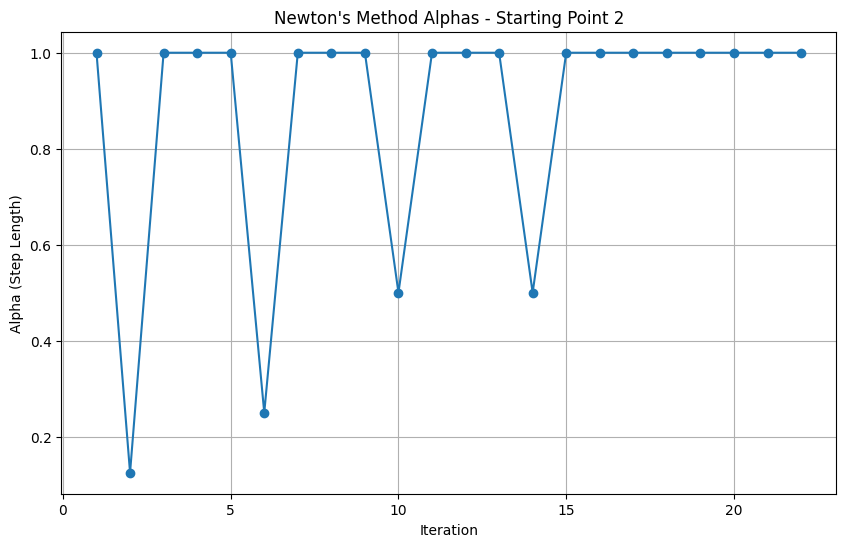

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#Definimos la función de Rosenbrock en dos variables:
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

#Su gradiente y Hessiana
def rosenbrock_gradient(x):
    return np.array([
        -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]),
        200 * (x[1] - x[0]**2)
    ])

def rosenbrock_hessian(x):
    return np.array([
        [-400 * (x[1] - 3 * x[0]**2) + 2, -400 * x[0]],
        [-400 * x[0], 200]
    ])


#Esta función nos permite encontrar un valor de alpha adecuado usando
#backtracking_line_search. Comenzamos con rho = 0.5 y c= 1e^-4
def backtracking_line_search(f, x, d, alpha=1, rho=0.5, c=1e-4):
    grad = rosenbrock_gradient(x)
    while f(x + alpha * d) > f(x) + c * alpha * np.dot(grad, d):
        alpha *= rho
    return alpha


#Definimos steepest_descent, nos vemos siguiendo el opuesto del gradiente,
#Con una tolerancia de 1e-6, nos detendremos si la distancia entre el nuevo
#y el anterior es menor a dicha tolerancia.
def steepest_descent(x0, max_iter=1000, tol=1e-6):
    #Comenzamos en x_{0}
    x = x0
    path = [x]
    alphas = []

    #Iteramos hasta 1000
    for i in range(max_iter):
        #Calculamos el gradiente en x_{k}
        grad = rosenbrock_gradient(x)
        #Y lo usamos para definir la dirección de descenso
        d = -grad
        #Usamos backtracking line search para encontrar un alpha adecuado
        alpha = backtracking_line_search(rosenbrock, x, d)
        alphas.append(alpha)
        #Definimos el nuevo punto siguiendo dicha dirección
        x_new = x + alpha * d

        #Si la distancia entre nuestro nuevo punto y el anterior es menor a la
        #tolerancia, paramos.
        if np.linalg.norm(x_new - x) < tol:
            break

        #Si no, continuamos
        x = x_new
        path.append(x)

    #Se devuelven el camino seguido y los valores de alpha
    return np.array(path), alphas


#Iniciamos el metodo de Newton tal y como antes (mismas iteraciones y tolerancia)
def newton_method(x0, max_iter=1000, tol=1e-6):
    x = x0
    path = [x]
    alphas = []

    for i in range(max_iter):
        #Calculamos el gradiente y la Hessiana en x y resolvemos el sistema
        # Hd = -g para encontrar nuestra dirección de descenso
        grad = rosenbrock_gradient(x)
        hess = rosenbrock_hessian(x)
        d = -np.linalg.solve(hess, grad)
        #Encontramos nuestro alpha adecuado con backtracking line search
        alpha = backtracking_line_search(rosenbrock, x, d)
        alphas.append(alpha)
        #Nos movemos en la dirección encontrada
        x_new = x + alpha * d

        #El resto es igual que en steepest_descent
        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new
        path.append(x)

    return np.array(path), alphas

#Definimos una función para visualizar los valores de alpha
def plot_alphas(alphas, title):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(alphas) + 1), alphas, marker='o')
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Alpha (Step Length)')
    plt.grid(True)
    plt.show()



#inicializamos los algoritmos con los para cada uno de los puntos dados
initial_points = [np.array([1.2, 1.2]), np.array([-1.2, 1])]

for i, x0 in enumerate(initial_points):
    print(f"\nStarting point: {x0}")

    sd_path, sd_alphas = steepest_descent(x0)
    print("\nSteepest Descent:")
    #El punto final sera el último elemento de nuestra lista
    print(f"Final point: {sd_path[-1]}")
    #Calculamos el minimo
    print(f"Function value: {rosenbrock(sd_path[-1])}")
    #Imprimimos el numero de iteraciones y los aplhas usadas junto con su grafica
    print(f"Number of iterations: {len(sd_path)}")
    print("Step lengths:", sd_alphas)
    plot_alphas(sd_alphas, f"Steepest Descent Alphas - Starting Point {i+1}")


    #Hacemos lo mismo para el metodo de Newton
    newton_path, newton_alphas = newton_method(x0)
    print("\nNewton's Method:")
    print(f"Final point: {newton_path[-1]}")
    print(f"Function value: {rosenbrock(newton_path[-1])}")
    print(f"Number of iterations: {len(newton_path)}")
    print("Step lengths:", newton_alphas)
    plot_alphas(newton_alphas, f"Newton's Method Alphas - Starting Point {i+1}")